<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/Kaggle%2C%20%EB%8D%B0%EC%9D%B4%EC%BD%98/titanic_0717.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.corr()

<ipython-input-6-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# 전처리(Pre-Processing)

## Name

In [7]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# 영어에는 이름 앞에 Mr, Mrs 등 결혼 여부를 알려줄 수 있습니다.
# 이 명칭을 추출하여 'Title'이라는 컬럼에 저장하도록 하겠습니다.
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [8]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don',
                                         'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer',
                                         'Dona', 'Mlle', 'Ms', 'Mme'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
# train 데이터에는 Mr, Mrs, Miss 외에 다양한 명칭들이 있는데
# 이 값들을 모두 분류화시켜주면 더 정확해질 수는 있겠지만, 그 데이터 양이 매우 적습니다.(총 27개)
# 복잡도를 증가시키지 않기 위해 다른 명칭들을 모두 'Other'로 통일하도록 하겠습니다.
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [9]:
train['Title_label'] = train['Title'].astype('category').cat.codes
train[['Title','Title_label']]
# Miss : 1
# Mr : 2
# Mrs : 3
# Other : 4

,Title,Title_label
0,Mr,2
1,Mrs,3
2,Miss,1
3,Mrs,3
4,Mr,2
...,...,...
886,Other,4
887,Miss,1
888,Miss,1
889,Mr,2


In [10]:
# test 에도 같은 작업
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don',
                                       'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer',
                                       'Dona', 'Mlle', 'Ms', 'Mme'], 'Other')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

test['Title_label'] = train['Title'].astype('category').cat.codes
test[['Title','Title_label']]

,Title,Title_label
0,Mr,2
1,Mrs,3
2,Mr,1
3,Mr,3
4,Mrs,2
...,...,...
413,Mr,2
414,Other,2
415,Mr,3
416,Mr,3


In [11]:
# 한번에 처리하기
전체데이터 = [train, test]

for 데이터 in 전체데이터:
    데이터['Title'] = 데이터['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

mapping_data = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3,
                "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3, "Ms": 3, "Lady": 3,
                "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for 데이터 in 전체데이터:
    데이터['Title'] = 데이터['Title'].map(mapping_data)

In [12]:
# 불필요 데이터 지우기
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

train.drop('Title', axis=1, inplace=True)
test.drop('Title', axis=1, inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title_label  891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB


## Age

In [14]:
# Age는 결측치가 있는 값이므로 아래와 같이 결측치를 채워주도록 하겠습니다.
# 각각의 Title_label의 그룹별 평균 값으로 결측치를 채우는 코드입니다.
train["Age"].fillna(train.groupby("Sex")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("median"), inplace=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title_label  891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB


In [16]:
for 데이터 in 전체데이터:
    데이터.loc[ 데이터['Age'] <= 16, 'Age'] = 0
    데이터.loc[(데이터['Age'] > 16) & (데이터['Age'] <= 26), 'Age'] = 1
    데이터.loc[(데이터['Age'] > 26) & (데이터['Age'] <= 36), 'Age'] = 2
    데이터.loc[(데이터['Age'] > 36) & (데이터['Age'] <= 62), 'Age'] = 3
    데이터.loc[ 데이터['Age'] > 62, 'Age'] = 4
# 1 : 0~10세
# 2 : 11~25세
# 3 : 25~36세
# 4 : 36~60세
# 5 : 60세 이상

In [17]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,2


## Fare

In [18]:
# Fare 값은 이미 숫자이지만 단순화하기 위해 pd.qcut 을 이용하여 요금별 구간을 5구간으로 나누어서 아래와 같이 진행할 수 있습니다.
# 그 전에 Age에서 했었던 방식처럼 if문을 조합하여 구간별로 나누셔도 괜찮습니다.
for 데이터 in 전체데이터:
    데이터['Fare_bin'] = pd.qcut(train['Fare'], 5)
    데이터['Fare_label'] = 데이터['Fare_bin'].astype('category').cat.codes

In [19]:
train[['Fare','Fare_bin','Fare_label']]
# (-0.001, 7.854] : 0
# (7.854, 10.5] : 1
# (10.5, 21.679] : 2
# (21.679, 39.688] : 3
# (39.688, 512.329] : 4

,Fare,Fare_bin,Fare_label
0,7.2500,"(-0.001, 7.854]",0
1,71.2833,"(39.688, 512.329]",4
2,7.9250,"(7.854, 10.5]",1
3,53.1000,"(39.688, 512.329]",4
4,8.0500,"(7.854, 10.5]",1
...,...,...,...
886,13.0000,"(10.5, 21.679]",2
887,30.0000,"(21.679, 39.688]",3
888,23.4500,"(21.679, 39.688]",3
889,30.0000,"(21.679, 39.688]",3


In [20]:
# 불필요 데이터 지우기
for 데이터 in 전체데이터:
    데이터.drop('Fare', axis=1, inplace=True)
    데이터.drop('Fare_bin', axis=1, inplace=True)

## Family

In [21]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [22]:
mapping_data = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6,
                6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for 데이터 in 전체데이터:
    데이터['FamilySize'] = 데이터['FamilySize'].map(mapping_data)

In [23]:
# 불필요 데이터 지우기
for 데이터 in 전체데이터:
    데이터.drop('SibSp', axis=1, inplace=True)
    데이터.drop('Parch', axis=1, inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,1,0,3,male,1.0,A/5 21171,NaN,S,2,0,0.4
1,2,1,1,female,3.0,PC 17599,C85,C,3,4,0.4
2,3,1,3,female,1.0,STON/O2. 3101282,NaN,S,1,1,0.0
3,4,1,1,female,2.0,113803,C123,S,3,4,0.4
4,5,0,3,male,2.0,373450,NaN,S,2,1,0.0


## Embarked

In [25]:
for 데이터 in 전체데이터:
    데이터['Embarked'] = 데이터['Embarked'].fillna('S')

In [26]:
mapping_data = {"S": 0, "C": 1, "Q": 2}
for 데이터 in 전체데이터:
    데이터['Embarked'] = 데이터['Embarked'].map(mapping_data)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,1,0,3,male,1.0,A/5 21171,NaN,0,2,0,0.4
1,2,1,1,female,3.0,PC 17599,C85,1,3,4,0.4
2,3,1,3,female,1.0,STON/O2. 3101282,NaN,0,1,1,0.0
3,4,1,1,female,2.0,113803,C123,0,3,4,0.4
4,5,0,3,male,2.0,373450,NaN,0,2,1,0.0


## Sex

In [28]:
test['Sex'] = test['Sex'].astype('category').cat.codes
train['Sex'] = train['Sex'].astype('category').cat.codes

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,1,0,3,1,1.0,A/5 21171,NaN,0,2,0,0.4
1,2,1,1,0,3.0,PC 17599,C85,1,3,4,0.4
2,3,1,3,0,1.0,STON/O2. 3101282,NaN,0,1,1,0.0
3,4,1,1,0,2.0,113803,C123,0,3,4,0.4
4,5,0,3,1,2.0,373450,NaN,0,2,1,0.0


## Cabin

In [30]:
train['Cabin'] = train['Cabin'].fillna('X')
train['Cabin'] = train['Cabin'].apply(lambda x: x[0])
train['Cabin'] = train['Cabin'].replace({'G':'X', 'T':'X'})

In [31]:
test['Cabin'] = test['Cabin'].fillna('X')
test['Cabin'] = test['Cabin'].apply(lambda x: x[0])
test['Cabin'] = test['Cabin'].replace({'G':'X', 'T':'X'})

In [32]:
test['Cabin'].value_counts()

X    328
C     35
B     18
D     13
E      9
F      8
A      7
Name: Cabin, dtype: int64

In [33]:
mapping_data = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "X": 6}
for 데이터 in 전체데이터:
    데이터['Cabin'] = 데이터['Cabin'].map(mapping_data)

In [34]:
test['Cabin'].value_counts()

6    328
2     35
1     18
3     13
4      9
5      8
0      7
Name: Cabin, dtype: int64

## Drop Data

In [35]:
for 데이터 in 전체데이터:
    데이터.drop('Ticket', axis=1, inplace=True)
    # 데이터.drop('Cabin', axis=1, inplace=True)
    데이터.drop('PassengerId', axis=1, inplace=True)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,0,3,1,1.0,6,0,2,0,0.4
1,1,1,0,3.0,2,1,3,4,0.4
2,1,3,0,1.0,6,0,1,1,0.0
3,1,1,0,2.0,2,0,3,4,0.4
4,0,3,1,2.0,6,0,2,1,0.0


In [37]:
test.head()

,Pclass,Sex,Age,Cabin,Embarked,Title_label,Fare_label,FamilySize
0,3,1,2.0,6,2,2,0,0.0
1,3,0,3.0,6,0,3,4,0.4
2,2,1,3.0,6,2,1,1,0.0
3,3,1,2.0,6,0,3,4,0.0
4,3,0,1.0,6,0,2,1,0.8


## 상관도 분석

In [38]:
train.corr()

,Survived,Pclass,Sex,Age,Cabin,Embarked,Title_label,Fare_label,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.072077,-0.283307,0.106811,-0.052471,0.317783,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.286667,0.735122,0.045702,-0.195910,-0.705206,0.065997
Sex,-0.543351,0.131900,1.000000,0.084630,0.110057,-0.116569,0.040484,-0.244943,-0.200988
Age,-0.072077,-0.286667,0.084630,1.000000,-0.200701,0.034334,0.447788,0.087896,-0.238659
Cabin,-0.283307,0.735122,0.110057,-0.200701,1.000000,-0.044041,-0.120093,-0.536572,0.013618
Embarked,0.106811,0.045702,-0.116569,0.034334,-0.044041,1.000000,-0.081928,-0.089125,-0.080281
Title_label,-0.052471,-0.195910,0.040484,0.447788,-0.120093,-0.081928,1.000000,0.060707,-0.207530
Fare_label,0.317783,-0.705206,-0.244943,0.087896,-0.536572,-0.089125,0.060707,1.000000,0.418125
FamilySize,0.016639,0.065997,-0.200988,-0.238659,0.013618,-0.080281,-0.207530,0.418125,1.000000


<Axes: >

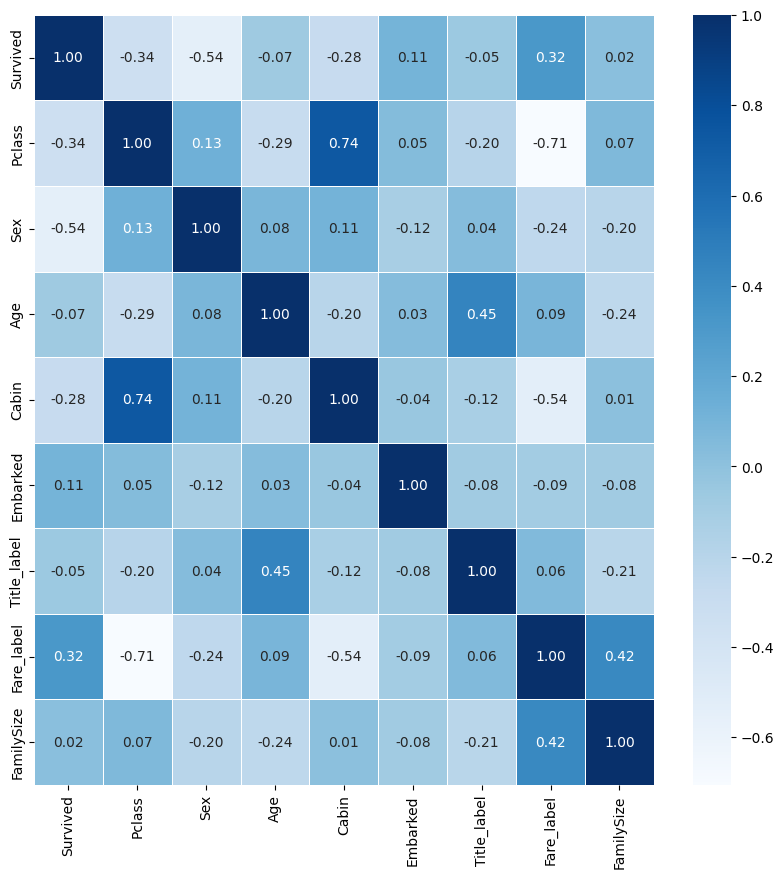

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

# Modelling

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

## Cross Validation (K-fold)

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### kNN

In [44]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [45]:
# kNN 점수 확인
round(np.mean(score)*100, 2)

82.72

### Decision Tree

In [46]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [47]:
# decision tree 점수 확인
round(np.mean(score)*100, 2)

80.81

### Random Forest

In [48]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [49]:
# Random Forest 점수 확인
round(np.mean(score)*100, 2)

80.92

### Naive Bayes

In [50]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [51]:
# Naive Bayes 점수 확인
round(np.mean(score)*100, 2)

79.0

### SVM

In [52]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [53]:
round(np.mean(score)*100,2)

80.47

### XGBoost

In [54]:
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=13)
# clf2 = XGBClassifier(n_estimators=3, max_depth=5, min_child_weight=1, random_state=123)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score)*100,2)

83.27

### LightBGM

In [75]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score)*100,2)

82.27

### DecisionTree

In [76]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 100)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

round(np.mean(score)*100,2)

80.47

### Testing

In [71]:
clf = SVC()
clf.fit(train_data, target)
# test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test)

In [56]:
test_ori = pd.read_csv('/content/test.csv')

In [72]:
제출값 = pd.DataFrame({"PassengerId": test_ori["PassengerId"],
                     "Survived": prediction})
# 제출값.to_csv('titanic_ver_5.csv', index=False)

In [73]:
제출값

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


[회고]

EDA를 통해 새롭게 얻은 사실? 또는 새롭게 분석한 자료는?
- cabin 데이터를 drop 하지 않고 사용함

새롭게 생성한 데이터는 어떤 것이 있는지?
- cabin 데이터의 결측치를 'X'로 처리하고 수치형 데이터로 변환하여 추가 학습시킴

머신러닝 모델은 어떤 것을 써봤으며, 하이퍼파라미터는 어떤 것을 적용했는지?
- XGBoost, LightBGM 써봤지만 기존에 사용했던 SVM의 점수가 더 높았음

다른 사람의 분석 내용 중에서 참고할 만한 것은 어떤것이 있었는지?
- DecisionTree, RandomForest

예측결과가 어떻게 나왔고, 종합적으로 어떤게 가장 좋았는지?
- LightBGM 가장 낮았고
- cabin 데이터를 추가한 후 SVM을 돌렸을 때 0.76794로 가장 높았음
